# Global Solution 2024 - Data Science - Pegada de Carbono

## Abstract

Este projeto tem como objetivo analisar as emissões de CO₂ no Brasil e compará-las com outras regiões e países, focando em entender suas tendências ao longo do tempo e seu impacto ambiental. Utilizando dados de emissões de CO₂ de 1990 a 2018, o projeto investiga a evolução dessas emissões, com especial atenção ao Brasil, e realiza comparações com a média global, os países da OCDE e o continente Americano. A análise dos dados é complementada por visualizações interativas, que permitem uma avaliação clara e acessível das mudanças nas emissões, contribuindo para uma melhor compreensão dos padrões de emissão e suas implicações no contexto ambiental global.

## Integrantes do grupo
- Lucca Vilaça | RM 551538
- Pedro Henrique Farath | RM 98608
- Victor Marcondes Nuzzi | RM 98209


## Perguntas de Pesquisa:

1. Qual é a pegada de carbono média do Brasil nos últimos 10 anos?
2. Como a pegada de carbono do Brasil se compara com a média global de 1990 até 2018??
3. O Brasil tem uma taxa de emissão crescente ou decrescente em comparação com o Continente Americano?
4. Comparação das Emissões de CO₂ entre o Brasil e os Países da OCDE de 1990 até 2018
5. 
6. 
7. 
8. Como a pegada de carbono (emissões de CO₂) do Brasil se compara com a média global, os países da OCDE, o Continente Americano e os Estados Unidos ao longo do período de 1990 a 2018?
9. 
10. 


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas

emissao_global_data = pd.read_csv("Carbon_(CO2)_Emissions_by_Country.csv")
emissao_global_1990_2018 = pd.read_csv("historical_emissions.csv")

emissao_global_data.drop_duplicates(inplace=True)
emissao_global_data.dropna(inplace=True)

emissao_global_1990_2018.drop_duplicates(inplace=True)
emissao_global_1990_2018.dropna(inplace=True)


ModuleNotFoundError: No module named 'hvplot'

## Limpeza de Dados

Neste processo, aplicamos etapas de limpeza para garantir que os dados estejam prontos para análise. Primeiramente, removemos duplicatas nos DataFrames para evitar que informações repetidas distorçam os resultados. Em seguida, eliminamos valores ausentes para garantir que apenas dados completos sejam utilizados nas análises. Essas etapas são fundamentais para garantir a integridade dos dados e facilitar a análise subsequente.


C:\Users\victo\AppData\Local\Temp\ipykernel_27232\3254068541.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brasil_10_anos["Year"] = brasil_10_anos["Date"].dt.year


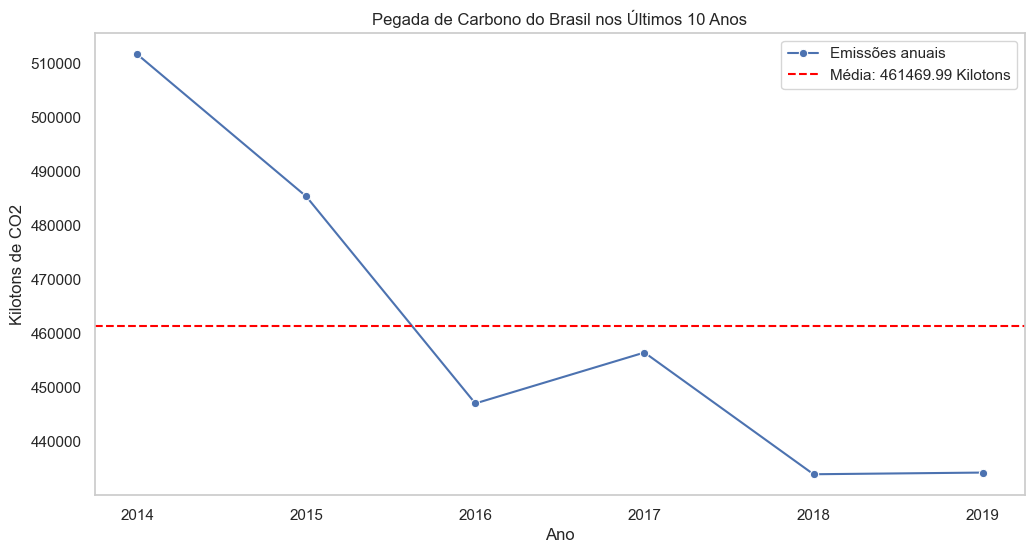

A pegada de carbono média do Brasil nos últimos 10 anos foi de 461469.99 kilotons.


In [19]:
# Questão 1 - Qual é a pegada de carbono média do Brasil nos últimos 10 anos?

emissao_global_data["Date"] = pd.to_datetime(emissao_global_data["Date"])

brasil_10_anos = emissao_global_data[
    (emissao_global_data["Country"] == "Brazil") & 
    (emissao_global_data["Date"].dt.year >= 2014)
]

media_carbono = brasil_10_anos["Kilotons of Co2"].mean()

emissao_global_data["Date"] = pd.to_datetime(emissao_global_data["Date"])

brasil_10_anos = emissao_global_data[
    (emissao_global_data["Country"] == "Brazil") & 
    (emissao_global_data["Date"].dt.year >= 2014)
]

media_carbono = brasil_10_anos["Kilotons of Co2"].mean()

brasil_10_anos["Year"] = brasil_10_anos["Date"].dt.year

plt.figure(figsize=(12, 6))
sns.lineplot(data=brasil_10_anos, x="Year", y="Kilotons of Co2", marker="o", label="Emissões anuais")
plt.axhline(media_carbono, color="red", linestyle="--", label=f"Média: {media_carbono:.2f} Kilotons")
plt.title("Pegada de Carbono do Brasil nos Últimos 10 Anos")
plt.xlabel("Ano")
plt.ylabel("Kilotons de CO2")
plt.legend()
plt.grid()
plt.show()

print(f"A pegada de carbono média do Brasil nos últimos 10 anos foi de {media_carbono:.2f} kilotons.")

## Questão 1 - Qual é a pegada de carbono média do Brasil nos últimos 10 anos?

Para calcular a pegada de carbono média do Brasil nos últimos 10 anos, primeiro convertemos a coluna de data para o formato datetime para facilitar a manipulação temporal. Em seguida, filtramos os dados para incluir apenas os registros do Brasil a partir de 2014. Após isso, calculamos a média das emissões de CO₂ (em kilotons) durante esse período.

O gráfico gerado ilustra as emissões anuais do Brasil, com uma linha horizontal indicando a média das emissões ao longo dos anos. O valor da média também é impresso como resultado final.

Esses passos são importantes para entender a evolução das emissões de CO₂ no Brasil nos últimos anos, fornecendo uma visão clara de seu impacto ambiental.

C:\Users\victo\AppData\Local\Temp\ipykernel_27232\472626506.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dados_comparacao, x='Categoria', y='Emissões de CO₂', palette='Blues')
C:\Users\victo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


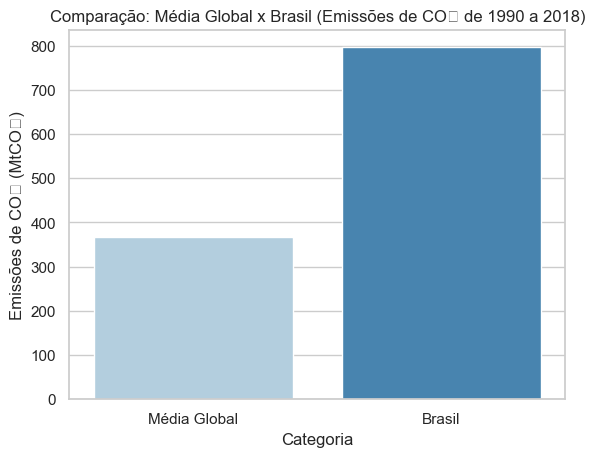

Comparação: Média Global x Brasil (Emissões de CO₂ de 1990 a 2018)

Média global de emissões de CO₂ de 1990 a 2018: 366.37 MtCO₂
Emissões de CO₂ do Brasil de 1990 a 2018: 796.62 MtCO₂


In [ ]:
# Questão 2 - Como a pegada de carbono do Brasil se compara com a média global de 1990 até 2018??

dados_brasil = emissao_global_1990_2018[emissao_global_1990_2018['Country'] == 'Brazil']

media_global_1990_2018 = emissao_global_1990_2018[['2018', '2017', '2016', '2015', '2014']].mean().mean()
media_brasil_1990_2018 = dados_brasil[['2018', '2017', '2016', '2015', '2014']].mean().mean()

dados_comparacao = pd.DataFrame({
    'Categoria': ['Média Global', 'Brasil'],
    'Emissões de CO₂': [media_global_1990_2018, media_brasil_1990_2018]
})

sns.barplot(data=dados_comparacao, x='Categoria', y='Emissões de CO₂', palette='Blues')
plt.title('Comparação: Média Global x Brasil (Emissões de CO₂ de 1990 a 2018)')
plt.ylabel('Emissões de CO₂ (MtCO₂)')
plt.show()

print(f"Comparação: Média Global x Brasil (Emissões de CO₂ de 1990 a 2018)\n")
print(f"Média global de emissões de CO₂ de 1990 a 2018: {media_global_1990_2018:.2f} MtCO₂")
print(f"Emissões de CO₂ do Brasil de 1990 a 2018: {media_brasil_1990_2018:.2f} MtCO₂")


## Questão 2 - Como a pegada de carbono do Brasil se compara com a média global de 1990 até 2018?

Para comparar a pegada de carbono do Brasil com a média global de 1990 a 2018, começamos filtrando os dados para o Brasil. Em seguida, calculamos a média das emissões de CO₂ para o Brasil e para o mundo durante os anos de 2014 a 2018, obtendo a média anual de emissões para cada período.

A comparação é visualizada por meio de um gráfico de barras, onde comparamos as emissões médias de CO₂ entre a média global e as do Brasil.

Com isso, conseguimos observar se o Brasil está abaixo ou acima da média global e entender melhor seu impacto ambiental em comparação com o restante do mundo.

C:\Users\victo\AppData\Local\Temp\ipykernel_27232\1310824934.py:42: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\victo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


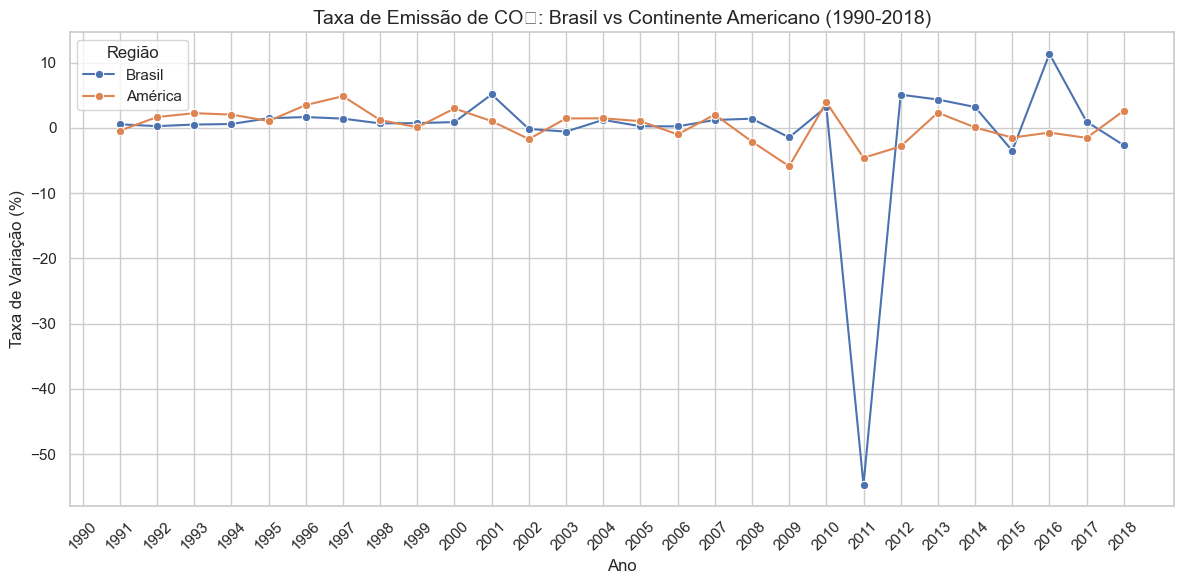

Taxa de Variação de Emissões de CO₂ - Brasil e Continente Americano (1990-2018):
 Ano  Taxa Brasil  Taxa América
1990          NaN           NaN
1991     0.559540     -0.423971
1992     0.279821      1.671439
1993     0.521999      2.263976
1994     0.602246      2.053840
1995     1.489070      1.061069
1996     1.671914      3.509352
1997     1.430800      4.866934
1998     0.700763      1.215344
1999     0.741777      0.100828
2000     0.900605      2.987861
2001     5.139288      1.051265
2002    -0.159792     -1.703133
2003    -0.559108      1.461866
2004     1.239365      1.476324
2005     0.262627      1.040478
2006     0.242381     -0.997212
2007     1.221518      2.046335
2008     1.421560     -2.091609
2009    -1.447790     -5.863702
2010     3.229450      3.939933
2011   -54.691628     -4.574692
2012     5.102341     -2.824340
2013     4.357268      2.343728
2014     3.211385      0.077569
2015    -3.487389     -1.476503
2016    11.355060     -0.709186
2017     0.959804     -

In [14]:
# Questão 3 - O Brasil tem uma taxa de emissão crescente ou decrescente em comparação com o Continente Americano?

brasil_emissoes = emissao_global_1990_2018[emissao_global_1990_2018['Country'] == 'Brazil']
america_emissoes = emissao_global_1990_2018[emissao_global_1990_2018['Country'].isin([
    'United States', 'Canada', 'Mexico', 'Argentina', 'Colombia', 'Chile', 'Peru', 'Venezuela', 
    'Guatemala', 'Ecuador', 'Cuba', 'Bolivia', 'Dominican Republic', 'Honduras', 'Paraguay', 'El Salvador',
    'Nicaragua', 'Costa Rica', 'Panama', 'Uruguay', 'Jamaica', 'Trinidad and Tobago', 'Belize', 'Barbados', 
    'Saint Lucia', 'Saint Vincent and the Grenadines', 'Grenada', 'Antigua and Barbuda', 'Saint Kitts and Nevis', 
    'Saint Pierre and Miquelon', 'Aruba', 'Curacao', 'Bermuda', 'Bahamas', 'Cayman Islands', 'Anguila', 'Montserrat', 
    'British Virgin Islands', 'Saint Barthélemy', 'Saint Martin', 'Sint Maarten', 'Sint Eustatius', 'Bonaire, Saint Eustatius, and Saba'
])]

anos = list(map(str, range(1990, 2019)))
brasil_emissoes = brasil_emissoes[['Country'] + anos]
america_emissoes = america_emissoes[['Country'] + anos]

brasil_total = brasil_emissoes[anos].sum()
america_total = america_emissoes[anos].sum()

dados_comparacao = pd.DataFrame({
    'Ano': anos,
    'Brasil': brasil_total.values,
    'América': america_total.values
})

dados_comparacao['Taxa Brasil'] = dados_comparacao['Brasil'].pct_change() * 100
dados_comparacao['Taxa América'] = dados_comparacao['América'].pct_change() * 100

variacao_brasil = ((brasil_total.iloc[-1] - brasil_total.iloc[0]) / brasil_total.iloc[0]) * 100
variacao_america = ((america_total.iloc[-1] - america_total.iloc[0]) / america_total.iloc[0]) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_comparacao, x='Ano', y='Taxa Brasil', label='Brasil', marker='o')
sns.lineplot(data=dados_comparacao, x='Ano', y='Taxa América', label='América', marker='o')

plt.title('Taxa de Emissão de CO₂: Brasil vs Continente Americano (1990-2018)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Taxa de Variação (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Região')

plt.tight_layout()
plt.show()

print("Taxa de Variação de Emissões de CO₂ - Brasil e Continente Americano (1990-2018):")
print(dados_comparacao[['Ano', 'Taxa Brasil', 'Taxa América']].to_string(index=False))

print(f"\nVariação Percentual Total (1990-2018):")
print(f"Brasil: {variacao_brasil:.2f}%")
print(f"América: {variacao_america:.2f}%")

## Questão 3 - O Brasil tem uma taxa de emissão crescente ou decrescente em comparação com o Continente Americano?

Para analisar a taxa de emissão de CO₂ do Brasil em comparação com o continente americano, selecionamos as emissões de CO₂ para os países da América e comparamos com as do Brasil. Calculamos a taxa de variação percentual das emissões anualmente, para avaliar se houve um aumento ou diminuição das emissões ao longo do tempo.

A comparação entre as taxas de variação de emissões do Brasil e da América foi visualizada por meio de gráficos de linha, onde podemos observar as mudanças na taxa de emissões de CO₂ ao longo dos anos de 1990 a 2018.

No final, calculamos a variação percentual total das emissões de 1990 a 2018 tanto para o Brasil quanto para o continente americano, o que nos permite identificar a tendência geral de crescimento ou redução das emissões em ambas as regiões.

C:\Users\victo\AppData\Local\Temp\ipykernel_27232\3314882056.py:44: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\victo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


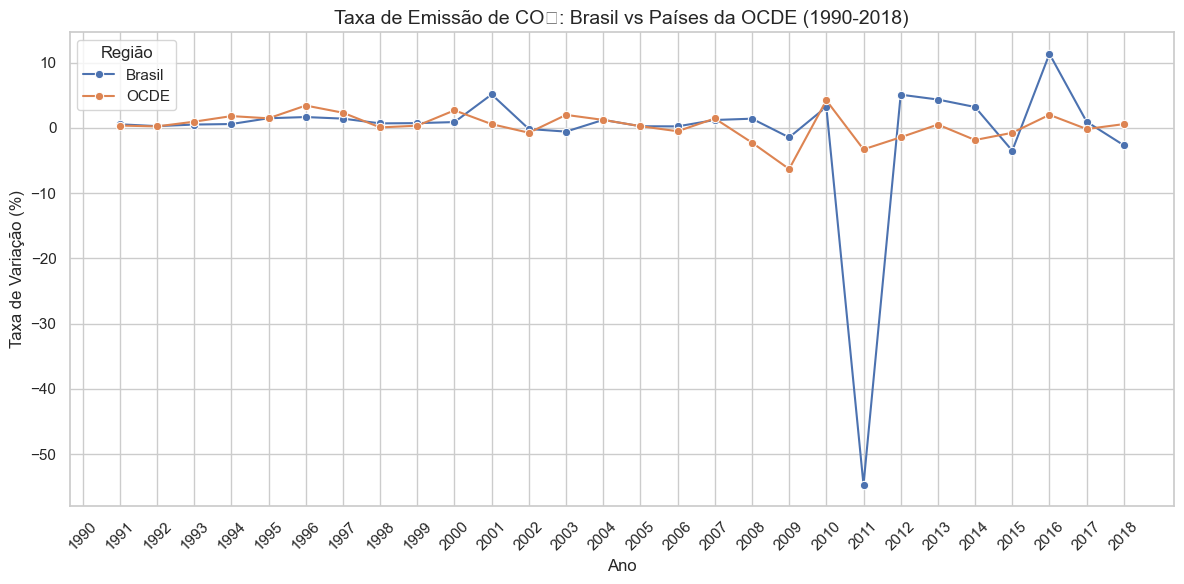

Taxa de Variação de Emissões de CO₂ - Brasil vs OCDE (1990-2018):
 Ano  Taxa Brasil  Taxa OCDE
1990          NaN        NaN
1991     0.559540   0.364479
1992     0.279821   0.237366
1993     0.521999   0.962408
1994     0.602246   1.816917
1995     1.489070   1.478002
1996     1.671914   3.436601
1997     1.430800   2.335347
1998     0.700763   0.083714
1999     0.741777   0.347324
2000     0.900605   2.704386
2001     5.139288   0.583156
2002    -0.159792  -0.731510
2003    -0.559108   2.002714
2004     1.239365   1.234611
2005     0.262627   0.274958
2006     0.242381  -0.505562
2007     1.221518   1.453352
2008     1.421560  -2.245544
2009    -1.447790  -6.291784
2010     3.229450   4.234539
2011   -54.691628  -3.282182
2012     5.102341  -1.428587
2013     4.357268   0.523828
2014     3.211385  -1.848985
2015    -3.487389  -0.738848
2016    11.355060   2.014091
2017     0.959804  -0.166167
2018    -2.651833   0.589419

Variação Percentual Total (1990-2018):
Brasil: -34.34%
OCDE: 9.

In [ ]:
# Questão 4 - Comparação das Emissões de CO₂ entre o Brasil e os Países da OCDE de 1990 até 2018


ocde_paises = [
    'United States', 'Canada', 'Mexico', 'Germany', 'France', 'United Kingdom', 'Italy', 'Spain', 
    'Japan', 'South Korea', 'Australia', 'Poland', 'Portugal', 'Austria', 'Netherlands', 'Belgium', 
    'Sweden', 'Denmark', 'Norway', 'Finland', 'Switzerland', 'Ireland', 'New Zealand', 'Czech Republic', 
    'Slovakia', 'Hungary', 'Slovenia', 'Estonia', 'Latvia', 'Lithuania', 'Greece', 'Luxembourg', 'Iceland', 
    'Israel', 'Turkey', 'Chile', 'South Africa'
]

brasil_emissoes = emissao_global_1990_2018[emissao_global_1990_2018['Country'] == 'Brazil']
ocde_emissoes = emissao_global_1990_2018[emissao_global_1990_2018['Country'].isin(ocde_paises)]

anos = list(map(str, range(1990, 2019)))
brasil_emissoes = brasil_emissoes[['Country'] + anos]
ocde_emissoes = ocde_emissoes[['Country'] + anos]

brasil_total = brasil_emissoes[anos].sum()
ocde_total = ocde_emissoes[anos].sum()

dados_comparacao = pd.DataFrame({
    'Ano': anos,
    'Brasil': brasil_total.values,
    'OCDE': ocde_total.values
})

dados_comparacao['Taxa Brasil'] = dados_comparacao['Brasil'].pct_change() * 100
dados_comparacao['Taxa OCDE'] = dados_comparacao['OCDE'].pct_change() * 100

variacao_brasil = ((brasil_total.iloc[-1] - brasil_total.iloc[0]) / brasil_total.iloc[0]) * 100
variacao_ocde = ((ocde_total.iloc[-1] - ocde_total.iloc[0]) / ocde_total.iloc[0]) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=dados_comparacao, x='Ano', y='Taxa Brasil', label='Brasil', marker='o')
sns.lineplot(data=dados_comparacao, x='Ano', y='Taxa OCDE', label='OCDE', marker='o')

plt.title('Taxa de Emissão de CO₂: Brasil vs Países da OCDE (1990-2018)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Taxa de Variação (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Região')

plt.tight_layout()
plt.show()

print("Taxa de Variação de Emissões de CO₂ - Brasil vs OCDE (1990-2018):")
print(dados_comparacao[['Ano', 'Taxa Brasil', 'Taxa OCDE']].to_string(index=False))

print(f"\nVariação Percentual Total (1990-2018):")
print(f"Brasil: {variacao_brasil:.2f}%")
print(f"OCDE: {variacao_ocde:.2f}%")

## Questão 4 - Comparação das Emissões de CO₂ entre o Brasil e os Países da OCDE de 1990 até 2018

Para analisar a comparação das emissões de CO₂ entre o Brasil e os países da OCDE (Organização para Cooperação e Desenvolvimento Econômico) entre 1990 e 2018, coletamos as emissões de CO₂ de ambos os grupos de países e calculamos a taxa de variação percentual anual.

Os dados das emissões de CO₂ foram agregados ao longo dos anos para o Brasil e para os países da OCDE. A comparação das taxas de variação de emissões foi visualizada por meio de gráficos de linha, que mostram a evolução das emissões ao longo do período.

Além disso, calculamos a variação percentual total das emissões de CO₂ de 1990 a 2018, tanto para o Brasil quanto para os países da OCDE, para entender a tendência de aumento ou diminuição das emissões de CO₂ em cada região ao longo do tempo.

In [ ]:
# Questão 5 - 




In [ ]:
# Questão 6 - 

In [ ]:
# Questão 7 - 

In [45]:
# Questão 8 - Como a pegada de carbono (emissões de CO₂) do Brasil se compara com a média global, os países da OCDE, o Continente Americano e os Estados Unidos ao longo do período de 1990 a 2018?

emissao_global_data['Date'] = pd.to_datetime(emissao_global_data['Date'], format='%d-%m-%Y')

ocde_paises = ['United States', 'Canada', 'Germany', 'France', 'United Kingdom', 'Italy', 'Japan', 'Australia', 'Mexico', 'South Korea', 'Spain', 'Poland', 'Netherlands', 'Turkey', 'Greece', 'Sweden', 'Portugal', 'Czech Republic', 'Slovakia', 'Hungary', 'New Zealand', 'Chile', 'Israel', 'Estonia', 'Ireland', 'Luxembourg', 'Austria', 'Belgium', 'Denmark', 'Finland', 'Norway']

brasil = emissao_global_data[emissao_global_data['Country'] == 'Brazil']
global_data = emissao_global_data.groupby('Date')['Kilotons of Co2'].mean()
america = emissao_global_data[emissao_global_data['Region'] == 'Americas'].groupby('Date')['Kilotons of Co2'].mean()
ocde = emissao_global_data[emissao_global_data['Country'].isin(ocde_paises)].groupby('Date')['Kilotons of Co2'].mean()
eua = emissao_global_data[emissao_global_data['Country'] == 'United States']

dados_comparacao = pd.concat([brasil.groupby('Date')['Kilotons of Co2'].sum(), 
                              global_data, 
                              america, 
                              ocde, 
                              eua.groupby('Date')['Kilotons of Co2'].sum()], axis=1)

dados_comparacao.columns = ['Brasil', 'Global', 'Americas', 'OCDE', 'EUA']

grafico_comparacao = dados_comparacao.hvplot.line(title="Comparação das Emissões de CO₂: Brasil vs Global vs OCDE vs EUA vs América", xlabel="Ano", ylabel="Emissões de CO₂ (Kilotons)", legend="top")

grafico_comparacao

AttributeError: 'DataFrame' object has no attribute 'hvplot'

## Questão 8 - Como a pegada de carbono (emissões de CO₂) do Brasil se compara com a média global, os países da OCDE, o Continente Americano e os Estados Unidos ao longo do período de 1990 a 2018?


In [ ]:
# Questão 9 - 

In [ ]:
# Questão 10 - 

## Conclusão e referências
